In [ ]:
import pandas as pd
import re
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
drive_path = "/content/drive/MyDrive/JobHunt/separated_postings.csv"  # Change this if needed
df = pd.read_csv(drive_path, engine="python", on_bad_lines='skip')

In [ ]:
def preprocess(text):
    text = re.sub(r'\W+', ' ', str(text).lower())  # Remove special characters and lowercase
    return text.split()  # Tokenize

In [ ]:
# Tokenize all job postings
sentences = df.iloc[:, 0].dropna().apply(preprocess).tolist()  # Assuming job postings are in the first column

# WORD 2 VEC

In [ ]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=10, min_count=5, workers=4)
word_vectors = word2vec_model.wv

## **UMAP**

In [ ]:
from umap import UMAP

# Apply UMAP instead of t-SNE for dimensionality reduction
words = list(word_vectors.index_to_key)
word_embeddings = np.array([word_vectors[word] for word in words])

umap = UMAP(n_components=2, random_state=42)
word_embeddings_2d = umap.fit_transform(word_embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


# CLUSTERING. CHANGE ALGO HERE. ENSURE CLUSTER NAME IS 'clusters'

In [ ]:
# Apply KMeans clustering
num_clusters = 10  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(word_embeddings_2d)

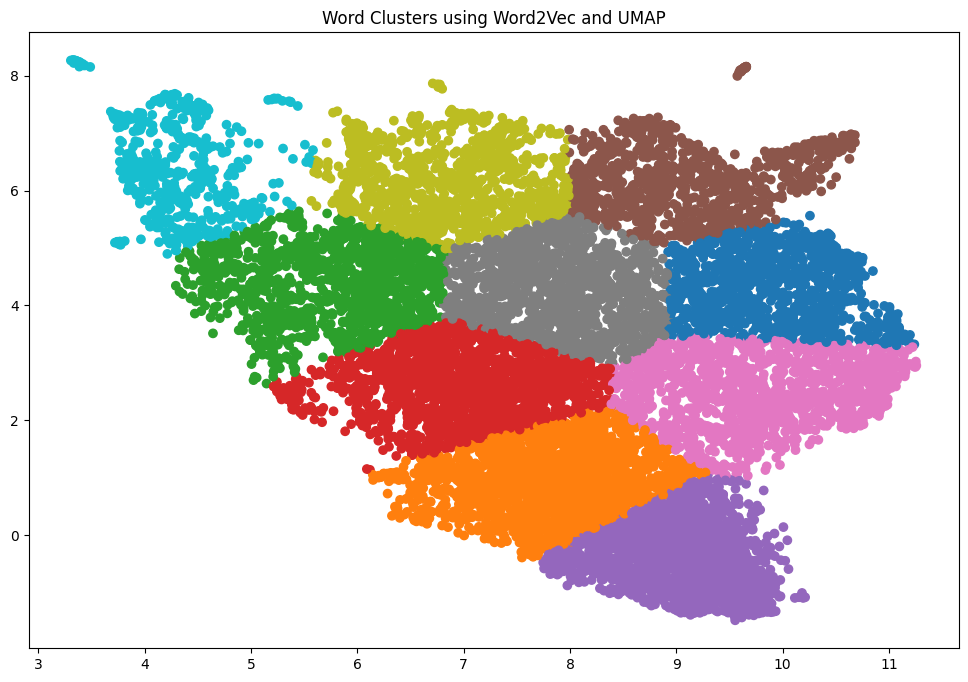

In [56]:
plt.figure(figsize=(12, 8))

# Scatter plot without annotations
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], c=clusters, cmap="tab10")

plt.title("Word Clusters using Word2Vec and UMAP")
plt.show()

# METRICS


Clustering Evaluation Metrics:
Silhouette Score: 0.3802 (Higher is better)
Davies-Bouldin Index: 0.7820 (Lower is better)
Calinski-Harabasz Index: 14954.9783 (Higher is better)


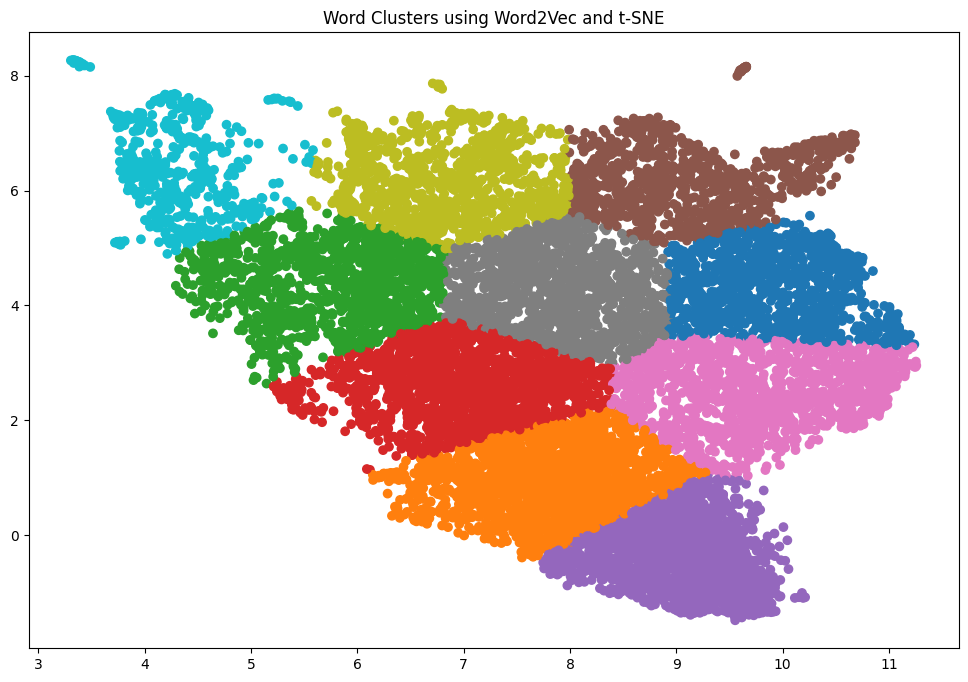

In [ ]:
# Compute internal evaluation metrics
silhouette_avg = silhouette_score(word_embeddings_2d, clusters)
davies_bouldin = davies_bouldin_score(word_embeddings_2d, clusters)
calinski_harabasz = calinski_harabasz_score(word_embeddings_2d, clusters)

print("\nClustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (Higher is better)")

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], c=clusters, cmap="tab10")
plt.title("Word Clusters using Word2Vec and t-SNE")
plt.show()

# Get first 100 worsds on each cluster

In [ ]:
clustered_words = {}
for cluster_id in range(num_clusters):
    indices = np.where(clusters == cluster_id)[0]
    sampled_indices = np.random.choice(indices, min(100, len(indices)), replace=False)
    clustered_words[cluster_id] = [words[i] for i in sampled_indices]

# Print sampled words per cluster
for cluster_id, word_list in clustered_words.items():
    print(f"\nCluster {cluster_id}:")
    print(", ".join(word_list))


Cluster 0:
negotiate, under, enforce, stories, backup, leaders, scoping, completion, follow, studies, map, reduction, updated, ensures, edit, met, reconciliations, websites, narrative, correspondence, primary, regional, acts, also, quality, entering, resolving, supplier, preparation, approvals, write, trends, guidance, logs, aspects, processing, analysis, scanning, other, alarms, donor, processors, progress, explanations, claims, conflict, responding, invoices, payment, financial, government, specimen, variances, payroll, times, daily, evaluation, yield, established, comply, decisions, programs, adequate, coordinate, funding, monitor, organizational, tasked, with, deadlines, understand, recoveries, testimony, procedure, firms, roi, suggesting, targeting, activity, researching, branding, pro, participate, initiates, facilitating, closeout, special, collaborates, compliance, prioritize, supporting, reconciliation, volume, administration, general, safety, groups, mitigation, advice, vend

# Find words on the clusters

In [ ]:
def annotate_words(word_list, word_vectors, word_embeddings_2d):
    """Annotate specific words on the scatter plot."""
    for word in word_list:
        if word in word_vectors.key_to_index:  # Check if the word exists in vocabulary
            idx = word_vectors.key_to_index[word]  # Get index directly from Word2Vec
            plt.annotate(word, (word_embeddings_2d[idx, 0], word_embeddings_2d[idx, 1]),
                         fontsize=9, color='black', ha='right')

## ANNOTATE TECH

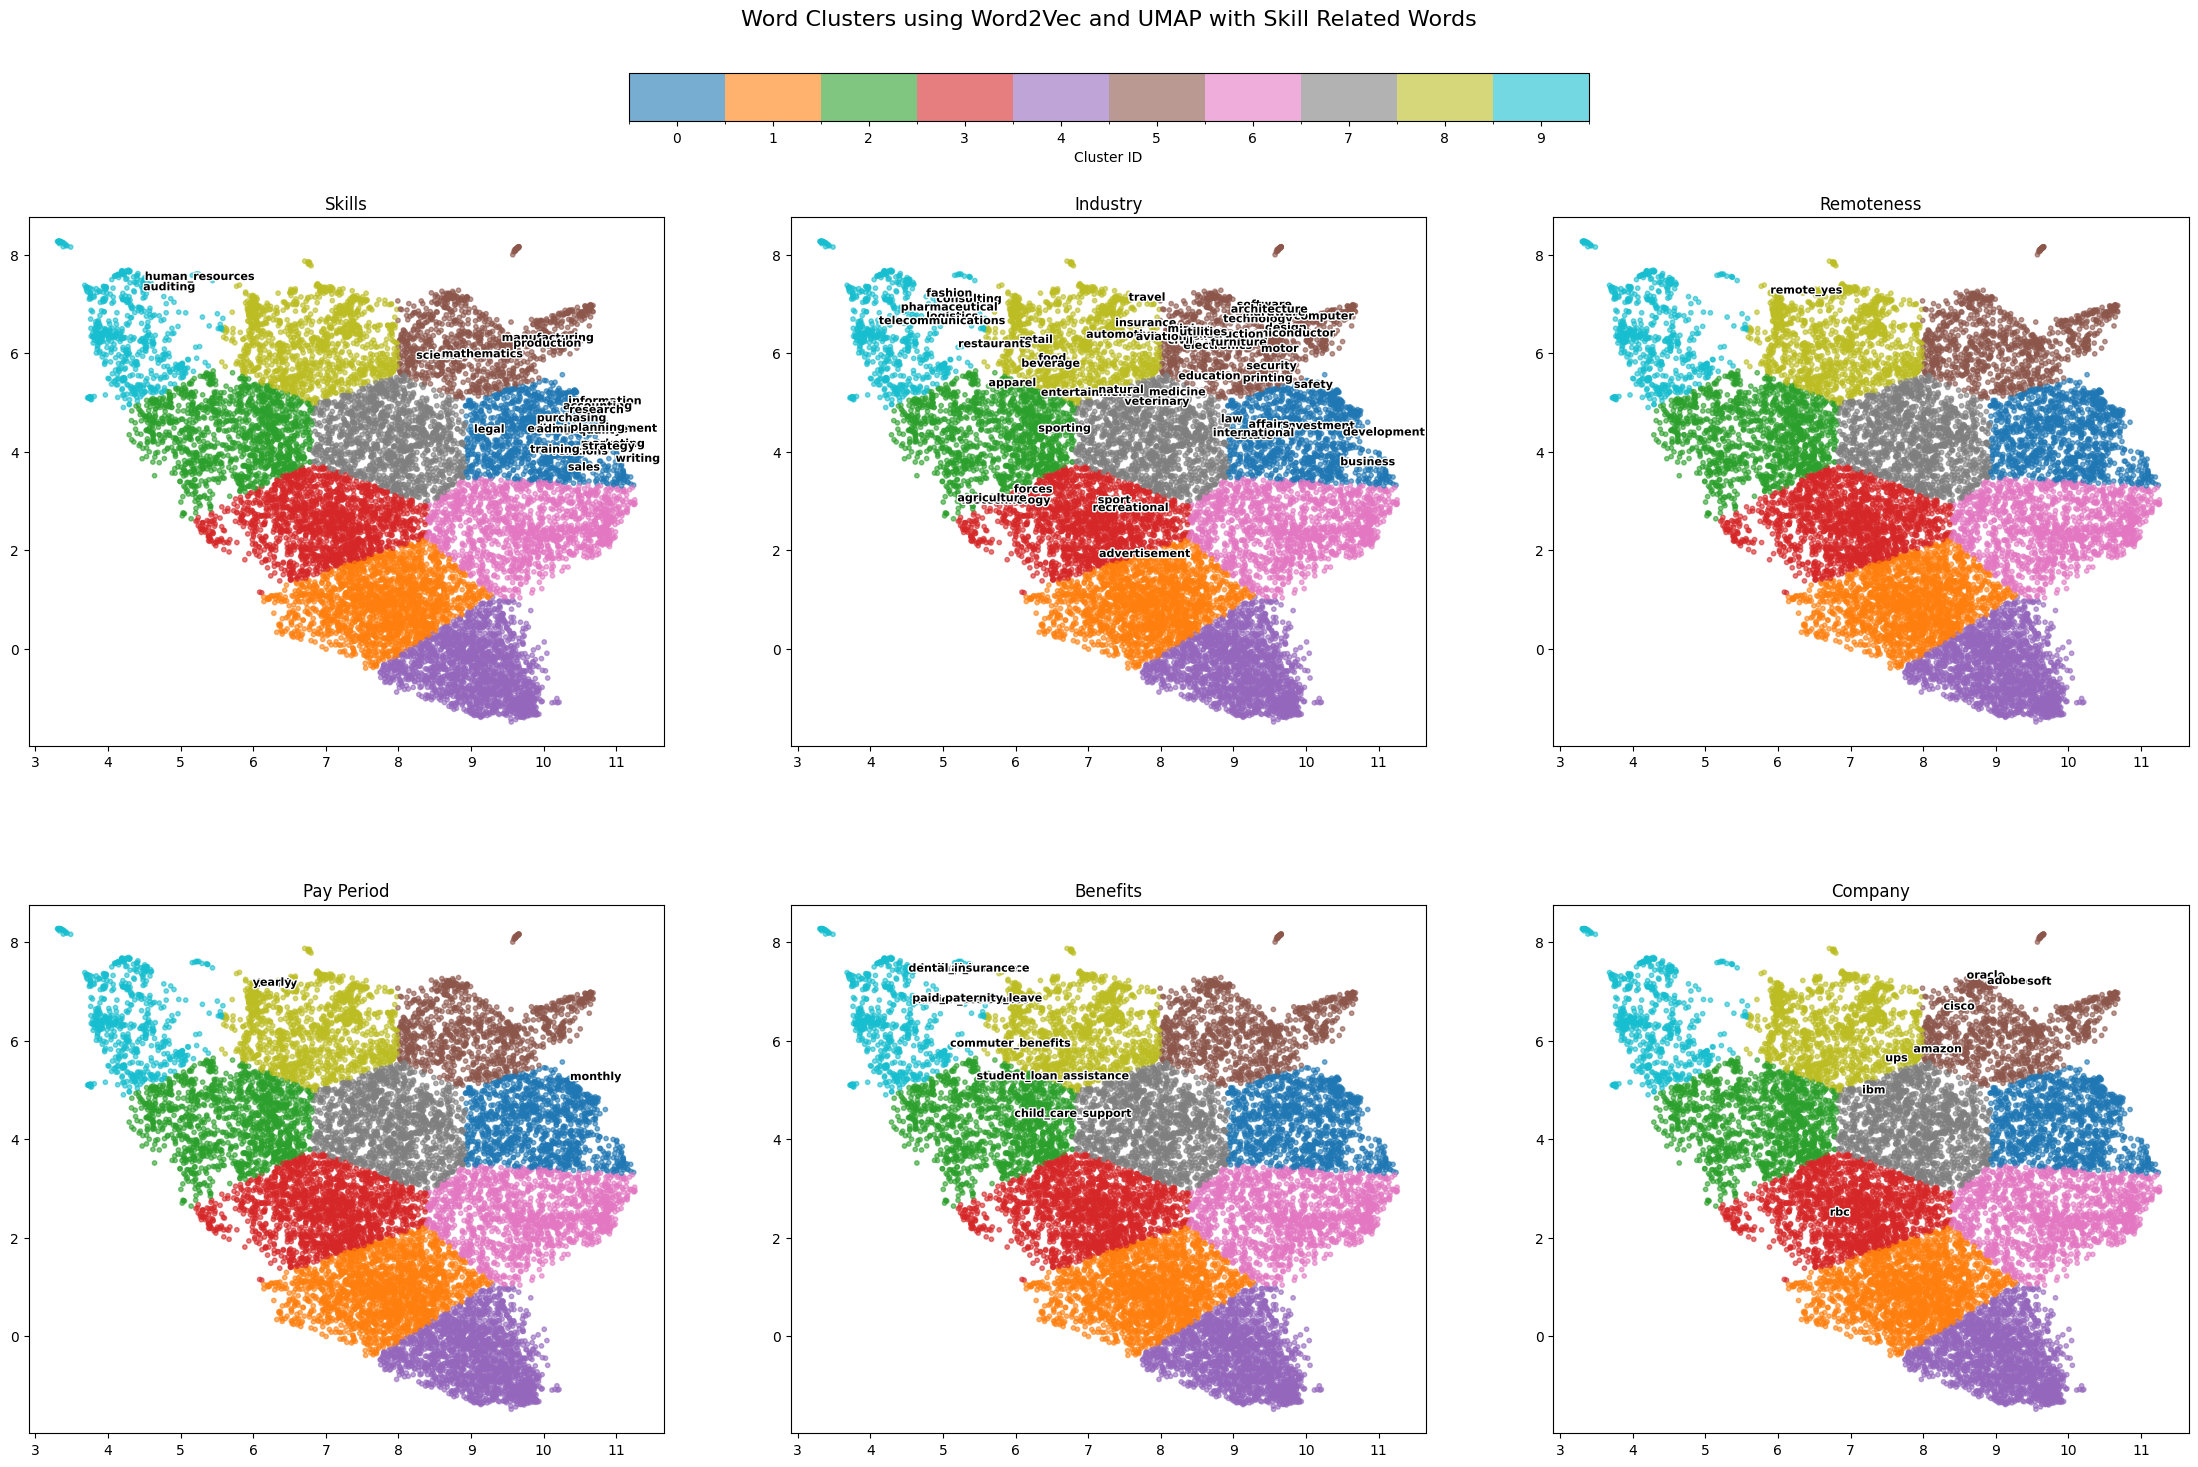

In [68]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import BoundaryNorm

fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Word Clusters using Word2Vec and UMAP with Skill Related Words', fontsize=16)

# List of data for each subplot
data = [
    (['Advertising', 'Art', 'Creative', 'Design', 'Distribution', 'Consulting', 'Analyst', 'Health', 'Care', 'science',
      'mathematics', 'legal', 'quality', 'information', 'relations', 'writing', 'editing', 'accounting', 'auditing',
      'manufacturing', 'sales', 'management', 'marketing', 'production', 'administrative', 'research', 'quality',
      'strategy', 'planning', 'purchasing', 'training', 'human_resources'], 'Skills'),
    (['technology', 'business', 'medicine', 'law', 'engineering', 'retail', 'food', 'apparel', 'entertainment', 'gambling',
      'design', 'investment', 'education', 'logistics', 'advertisement', 'beverage', 'natural', 'automotive', 'security',
      'ai', 'blockchain', 'defence', 'computer', 'hardware', 'software', 'development', 'semiconductor',
      'telecommunications', 'consulting', 'biotechnology', 'pharmaceutical', 'veterinary', 'fashion', 'sport',
      'sporting', 'electronics', 'furniture', 'travel', 'restaurants', 'recreational', 'insurance', 'estate',
      'construction', 'architecture', 'civil', 'aviation', 'motor', 'mining', 'utilities', 'farming', 'agriculture',
      'fisheries', 'forces', 'international', 'affairs', 'safety', 'printing'], 'Industry'),
    (['remote_yes', 'remote_no'], 'Remoteness'),
    (['hourly', 'yearly', 'monthly'], 'Pay Period'),
    (['medical_insurance', 'vision_insurance', 'tuition_assistance', '401_(k)', 'dental_insurance',
      'student_loan_assistance', 'disabililty_insurance', 'child_care_support', 'commuter_benefits',
      'paid_paternity_leave'], 'Benefits'),
    (['ibm', 'accenture', 'oracle', 'microsoft', 'cisco', 'nxp', 'pfizer', 'atos', 'honeywell', 'pepsiCo',
      'carestream', 'amazon', 'rbc', 'oracle', 'ge_healthcare', 'hawlett_packard_enterprise', 'bt_group', 'atos',
      'boeing', 'adobe', 'sanofi', 'harvard_university', 'aig', 'charles_schwab', 'medtronic', 'ups'], 'Company')
]

# Define the fixed colors for each cluster ID
cluster_colors = np.unique(clusters)
num_clusters = len(cluster_colors)

# Create a color map with specific colors for each cluster
cmap = plt.get_cmap("tab10", num_clusters)  # Using tab10 to match with cluster count
norm = BoundaryNorm(np.arange(num_clusters + 1) - 0.5, num_clusters)

# Plot each set of annotations
for ax, (annotations, title) in zip(axes.flat, data):
    scatter = ax.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1],
                         c=clusters, cmap=cmap, norm=norm, s=10, alpha=0.6)
    ax.set_title(title)
    for word in annotations:
        if word in word_vectors.key_to_index:
            idx = word_vectors.key_to_index[word]
            x, y = word_embeddings_2d[idx]
            txt = ax.text(x, y, word, fontsize=8, weight='bold', color='black')
            txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'), path_effects.Normal()])

# Adjust layout to fit the color bar below the title
fig.subplots_adjust(top=0.85, bottom=0.09, left=0.05, right=0.95, hspace=0.3, wspace=0.2)

# Add a horizontal color bar below the title and above the subplots
cbar_ax = fig.add_axes([0.3, 0.91, 0.4, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', ticks=range(num_clusters))
cbar.set_label('Cluster ID')
cbar.ax.set_xticklabels([str(i) for i in range(num_clusters)])

plt.show()
